In [2]:
# Librerias a usar
import pandas as pd
# Importamos el california housing dataset
from sklearn.datasets import fetch_california_housing
# Lo importamos como un dataframe
california = fetch_california_housing(as_frame=True)
df = california.frame

# Ejemplo de regresión con KNN

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Regresion con KNN
## Definiendo variable respuesta y variables independientes
y = df['MedHouseVal']
X = df.drop(['MedHouseVal'],axis=1)

Nota : Deje todas las variables, lo mas probable es que podríamos dejar de lado 'Latitude' y 'Longitude', tampoco hicimos anteriormente un analisis exploratorio para definir que variables podríamos dejar para este KNN.

In [5]:
# Observamos datos para ver si necesitamos estandarizar
X.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


Podemos observar que hay diferencias en maximos , minimos y promedios entre las variables que genererian un calculo erratico en las distancias!
Usaremos el StandardScaler más adelante

In [6]:
# Spliteando la data
from sklearn.model_selection import train_test_split
SEED = 777
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=SEED) # Dejamos 30% para testeo

In [7]:
# Estandarizando los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


Recordemos que cuando usamos StandarScaler, las columnas se pierden y quedan los datos solos, recreemos las columnas de nuestro X.

In [8]:
# Obteniendo columnas
columnas = df.columns.tolist()
# Borramos la columna que sería "y"
columnas.remove('MedHouseVal')

In [9]:
# Reconstruyendo X entrenamiento con nombre columnas
df_x_scaled = pd.DataFrame(X_train,columns=columnas)
df_x_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.504251,-1.007389,-0.525582,-0.124566,0.242746,-0.053181,1.096045,-1.237015
1,-0.412055,0.024345,0.327633,0.109119,-0.300592,-0.028807,1.405728,-0.876946
2,0.291964,-1.007389,0.267275,-0.125645,-0.559073,-0.022827,1.297808,-1.637090
3,0.111850,-1.245482,0.340454,-0.218557,0.434408,0.037764,1.232118,-1.232014
4,0.630173,-0.293111,0.271899,0.143822,0.113505,-0.004641,-0.419529,0.478310


In [10]:
# Describe escalado
df_x_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,14448.0,-2.268550e-16,1.000035,-1.761603,-0.685408,-0.179686,0.459673,5.804111
HouseAge,14448.0,1.277356e-16,1.000035,-2.197852,-0.848661,0.024345,0.659259,1.849722
AveRooms,14448.0,-1.622456e-16,1.000035,-1.984054,-0.423717,-0.079333,0.276354,59.296036
AveBedrms,14448.0,3.187357e-16,1.000035,-1.893932,-0.216125,-0.110905,0.016768,61.166732
Population,14448.0,-1.343498e-17,1.000035,-1.253631,-0.564568,-0.232015,0.269121,30.114889
AveOccup,14448.0,1.364198e-17,1.000035,-0.197515,-0.055777,-0.023861,0.014015,101.246969
Latitude,14448.0,1.416211e-16,1.000035,-1.447116,-0.794903,-0.644753,0.978740,2.968224
Longitude,14448.0,1.043524e-16,1.000035,-2.367229,-1.116992,0.543323,0.778367,2.628718


Ahora podemos entrenar nuestro KNN con 'df_x_scaled' el cual es nuestro dataset de variables independientes estandarizado.

In [11]:
# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5) # Los 5 vecinos mas cercanos, podemos tunearlo despues
regressor.fit(X_train,y_train)

# Predecir con dataset de testeo
y_pred = regressor.predict(X_test)



In [12]:
# Evaluando el modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error
## MAE
mae = mean_absolute_error(y_test,y_pred)
## MSE
mse = mean_squared_error(y_test,y_pred)
## RMSE
rmse = mean_squared_error(y_test,y_pred,squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')
print(f'r2:{regressor.score(X_test,y_test)}')



mae: 0.4276168359173126
mse: 0.3953901725710542
rmse: 0.6288005825148815
r2:0.6948557724883299


In [13]:
# Encontremos el mejor r2 basandonos en k (tomara un minuto app)
r2_list = []
for i in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    r2 = knn.score(X_test,y_test)
    r2_list.append(r2)

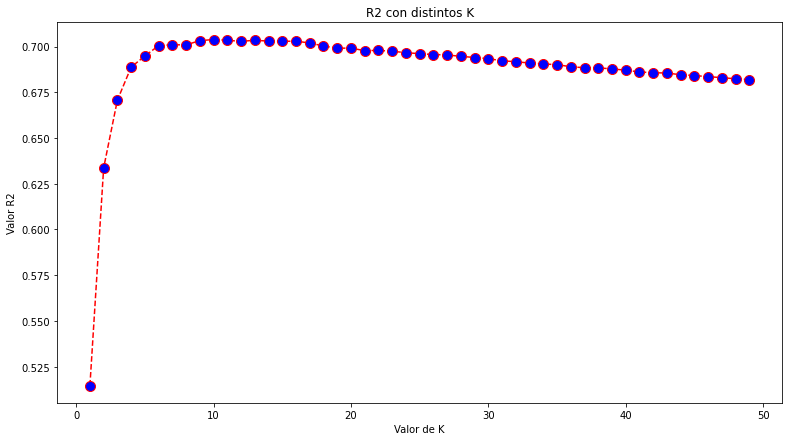

In [14]:
# Grafiquemos los r2 que obtuvimos
import matplotlib.pyplot as plt
plt.figure(figsize=(13,7))
plt.plot(range(1,50),r2_list,color='red',
        linestyle = 'dashed',marker='o',
        markerfacecolor='blue',markersize=10)
plt.title('R2 con distintos K')
plt.xlabel('Valor de K')
plt.ylabel('Valor R2')
plt.show()

Podemos observar que con K entre 10 y 15 estaríamos con nuestro mejor R2

In [15]:
# Veamos el maximo r2
max(r2_list)

0.7038175644588027

In [16]:
# Veamos en que K ocurre el maximo r2
import numpy as np
np.array(r2_list).argmax() #argmax nos da el indice del valor maximo! (en este caso sería el indice 9)
# Por lo que K optimo sería 9+1 = 10

9

In [17]:
# Modelo KNN con K = 10
knn_reg10 = KNeighborsRegressor(n_neighbors=10)
knn_reg10.fit(X_train,y_train)
y_pred10=knn_reg10.predict(X_test)
r2=knn_reg10.score(X_test,y_test)
print(r2)

0.7038175644588027


Entrenamos el modelo y obtuvimos el r2 que observamos en la lista de simulaciones.

In [18]:
# Poniendo un dataset nuevo para obtener valor de arriendo
# pip install openpyxl
import openpyxl
df_new = pd.read_excel('new_data.xlsx',engine='openpyxl')
df_new.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8,10,7,2,322,2.5,37.88,-122
1,7,41,4,1,2400,2.6,37.88,-122
2,9,50,9,2,1500,2.0,37.88,-122
3,5,20,3,2,1234,3.0,37.88,-122
4,6,5,2,1,1700,4.0,37.88,-122


In [19]:
# Estandarizamos nuestros datos antes de usarlos para predecir
df_new_scaled = scaler.fit_transform(df_new)
df_new_scaled

array([[ 0.77459667, -1.03661411,  0.95058638,  1.        , -1.57441471,
        -0.67177017,  0.        ,  0.        ],
       [ 0.        ,  0.55685882, -0.19011728, -1.        ,  1.63149785,
        -0.57346234,  0.        ,  0.        ],
       [ 1.54919334,  1.01947999,  1.71105548,  1.        ,  0.24298904,
        -1.16330933,  0.        ,  0.        ],
       [-1.54919334, -0.52259058, -0.57035183,  1.        , -0.16739245,
        -0.18023102,  0.        ,  0.        ],
       [-0.77459667, -1.29362587, -0.95058638, -1.        ,  0.55154655,
         0.80284728,  0.        ,  0.        ],
       [ 0.        ,  1.27649175, -0.95058638, -1.        , -0.68422628,
         1.78592559,  0.        ,  0.        ]])

In [20]:
# Lo dejamos como un dataframe
df_new_scaled = pd.DataFrame(df_new_scaled,columns=columnas)
df_new_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.774597,-1.036614,0.950586,1.0,-1.574415,-0.671770,0.0,0.0
1,0.000000,0.556859,-0.190117,-1.0,1.631498,-0.573462,0.0,0.0
2,1.549193,1.019480,1.711055,1.0,0.242989,-1.163309,0.0,0.0
3,-1.549193,-0.522591,-0.570352,1.0,-0.167392,-0.180231,0.0,0.0
4,-0.774597,-1.293626,-0.950586,-1.0,0.551547,0.802847,0.0,0.0


In [21]:
# Generamos las predicciones
knn_reg10.predict(df_new_scaled)

c:\Users\chuck\miniconda3\envs\default\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [24]:
# Apendamos los resultados a cada observación
df_predicted = pd.read_excel('new_data.xlsx',engine='openpyxl')
df_predicted['MedHouseVal'] = knn_reg10.predict(df_new_scaled)
df_predicted

c:\Users\chuck\miniconda3\envs\default\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8,10,7,2,322,2.5,37.88,-122,2.165200
1,7,41,4,1,2400,2.6,37.88,-122,1.844000
2,9,50,9,2,1500,2.0,37.88,-122,4.451706
3,5,20,3,2,1234,3.0,37.88,-122,0.645000
4,6,5,2,1,1700,4.0,37.88,-122,1.004000
5,7,55,2,1,899,5.0,37.88,-122,1.352000


Me habría gustado mostrar en un scatterplot el donde se encontraba el punto en comparación con los datos del primer dataset, pero tenemos mas de tres dimensiones por lo que graficar no se me ocurrió como.

# Ejemplo de clasificación con KNN

En este caso queremos predecir una categoria, y no un valor continuo, necesitaremos categorizar el valor de renta de alguna forma!

In [75]:
# Creamos cuatro categorías y se la asignamos a una columna nueva de categoría
df['MedHouseValCat'] = pd.qcut(df['MedHouseVal'], 4, retbins=False, labels=[1,2,3,4])
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedHouseValCat
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,4
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,4
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,4
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,4
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,1
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,1
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,1
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,1


In [76]:
# Separamos X e Y
y = df['MedHouseValCat']
X = df.drop(['MedHouseValCat','MedHouseVal'],axis=1)

In [82]:
# Generamos sets de entrenamiento y testeo

SEED = 888
X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size=0.25,random_state=SEED)

In [83]:
# Hacemos el scaling como anteriormente (son solo variables continuas, por lo que no es necesario algo para categoricas!)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Dejemoslo como un dataframe
X_train = pd.DataFrame(X_train,columns=columnas)
X_test = pd.DataFrame(X_test,columns=columnas)

In [84]:
# Creamos el modelo clasificador con KNN
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [85]:
# Predecimos
y_pred = classifier.predict(X_test)
y_pred

array([3, 1, 1, ..., 4, 1, 1], dtype=int64)

Evaluando el clasificador KNN

In [86]:
# Esta vez usemos el accuracy
acc = classifier.score(X_test,y_test)
print(acc)


0.6122093023255814


Nos da que el modelo acierta el 61% de los resultados. Veamos las otras metricas a revisar para un modelo de clasificación

              precision    recall  f1-score   support

           1       0.74      0.77      0.75      1337
           2       0.48      0.54      0.51      1302
           3       0.50      0.50      0.50      1269
           4       0.75      0.64      0.69      1252

    accuracy                           0.61      5160
   macro avg       0.62      0.61      0.61      5160
weighted avg       0.62      0.61      0.61      5160



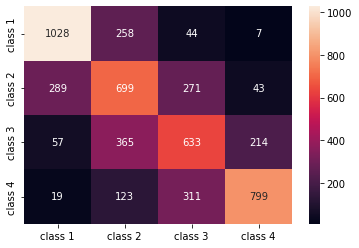

In [87]:
# Matriz de confusión
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

classes_name = ['class 1','class 2','class 3','class 4']
cm = pd.DataFrame(confusion_matrix(y_test,y_pred),
                    columns=classes_name, index = classes_name)

sns.heatmap(cm,annot=True,fmt='d');

print(classification_report(y_test, y_pred))

Podemos ver que la clase 1 y la clase 4 son las que menos le cuesta clasificar bien. Se observa que los mayores errores ocurren en la clase 2 y 3, ya que la clase 2 la clasifica muchas veces como 1 o 3, y la clase 3 muchas veces la clasifica como 2 o 4!

Finalmente la clase 4 es la que la clasifica bien, (tiene el segundo mejor puntaje f1 despues de la clase 1), y podemos observar que la clase 4 es la que menos cantidad tiene.

Tal ves las clases 2 y 3 estaban muy cerca en valor o similitud?, tal ves lo mejor sería convertir la clase 2 y 3 en solo una clase?, podria ser tambien el valor k que hemos usado?

## Encontrando el mejor K para la clasificación

In [88]:
# En este caso encontraremos el mejor K basandonos en el puntaje f1
from sklearn.metrics import f1_score

f1s = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    # Usamos ponderado para las 4 clases
    f1s.append(f1_score(y_test,pred_i,average='weighted'))

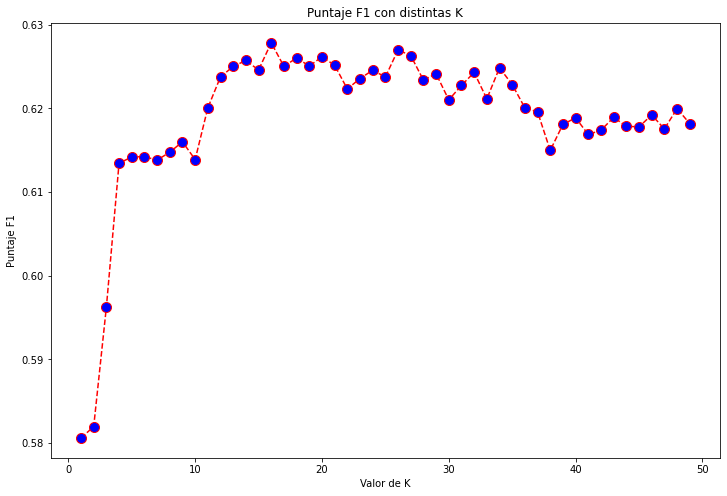

In [91]:
# Plotiemos los distintos f1 y veamos donde ocurre el mejor f1 dependiente de k

plt.figure(figsize=(12,8))
plt.plot(range(1,50),f1s,color='red',
        linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Puntaje F1 con distintas K')
plt.xlabel('Valor de K')
plt.ylabel('Puntaje F1')
plt.show()

In [92]:
# En que K ocurre el maximo f1
np.array(f1s).argmax()

15

## Modelo KNN clasificador con K = 15

In [93]:
# Instanciamos el modelo con k = 15
knn_k15= KNeighborsClassifier(n_neighbors=15)
knn_k15.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [96]:
# Predecimos
k15_pred = knn_k15.predict(X_test)

k15_pred

array([3, 1, 1, ..., 4, 1, 1], dtype=int64)

In [97]:
# Probemos el accuracy primero
knn_k15.score(X_test,y_test)

0.6218992248062015

In [99]:
# Veamos el F1
f1_score(y_test,k15_pred,average='weighted')

0.6245964305957893

              precision    recall  f1-score   support

           1       0.76      0.77      0.77      1337
           2       0.51      0.55      0.53      1302
           3       0.50      0.53      0.52      1269
           4       0.75      0.63      0.68      1252

    accuracy                           0.62      5160
   macro avg       0.63      0.62      0.62      5160
weighted avg       0.63      0.62      0.62      5160



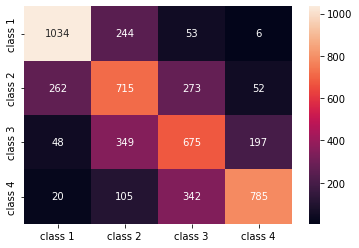

In [100]:
# Matriz de confusion

cm = pd.DataFrame(confusion_matrix(y_test,k15_pred),
                    columns=classes_name, index = classes_name)

sns.heatmap(cm,annot=True,fmt='d');

print(classification_report(y_test, k15_pred))

Podemos observar que el puntaje macro f1 aumento a 0.62, un poquito mejor. Podemos ver que todavía hay "confusión" entre la clase 2 y 3, pero en general mejoraron los verdaderos positivos entre las 4 clases.